In [44]:
# Read POP output
from netCDF4 import Dataset

# Select case to look at
exercise = 5

if (exercise == 3):
    casename = 'C.1D_1D.r8_cvmix'
    max_depth = 40.
    min_sst = 14.8; max_sst = 15.
    max_diff = 0.025; diff_contour = 0.001

if (exercise == 4):
    casename = 'C.1D_1D.no_taux'
    max_depth = 100.
    min_sst = 14.; max_sst = 15.
    max_diff = 0.15; diff_contour = 0.01

if (exercise == 5):
    casename = 'C.1D_1D.taux_and_windstress'
    max_depth = 25.
    min_sst = 14.8; max_sst = 17.
    max_diff = 0.024; diff_contour = 0.001

outputdir = '/Users/mlevy/codes/CESM/cesm1_2_2+cvmix/viz'
filename = outputdir + '/' + casename + '.pop.h.0001-01-02-01200.nc'

filedata = Dataset(filename)
time = filedata.variables['time'][:]-366
h = filedata.variables['HBLT'][:,0,0]
Kt = filedata.variables['VDC_T'][:,:,0,0]
Ku = filedata.variables['VVC'][:,:,0,0]
zi = filedata.variables['z_t'][:]
zl = filedata.variables['z_w_bot'][:]
u = filedata.variables['UVEL'][:,:,0,0]
v = filedata.variables['VVEL'][:,:,0,0]
temp = filedata.variables['TEMP'][:,:,0,0]

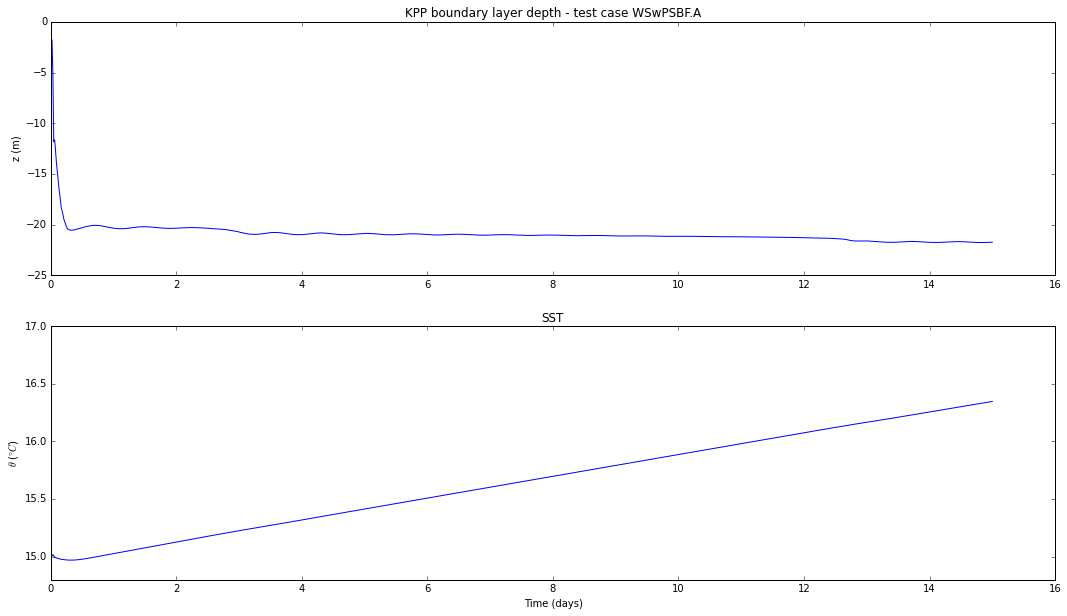

In [45]:
from matplotlib import pyplot as plt
%matplotlib inline

# Plot Boundary Layer Depth and SST as functions of time
plt.figure(figsize=[18,10])

plt.subplot(2,1,1)
plt.plot(time, -h/100,'-')
plt.ylim((-max_depth,0))
plt.ylabel('z (m)')
plt.title('KPP boundary layer depth - test case WSwPSBF.A')

plt.subplot(2,1,2)
plt.plot(time, temp[:,0],'-')
plt.ylim((min_sst,max_sst))
plt.xlabel('Time (days)')
plt.ylabel(r'$\theta$ (${\degree}C$)')
plt.title('SST')

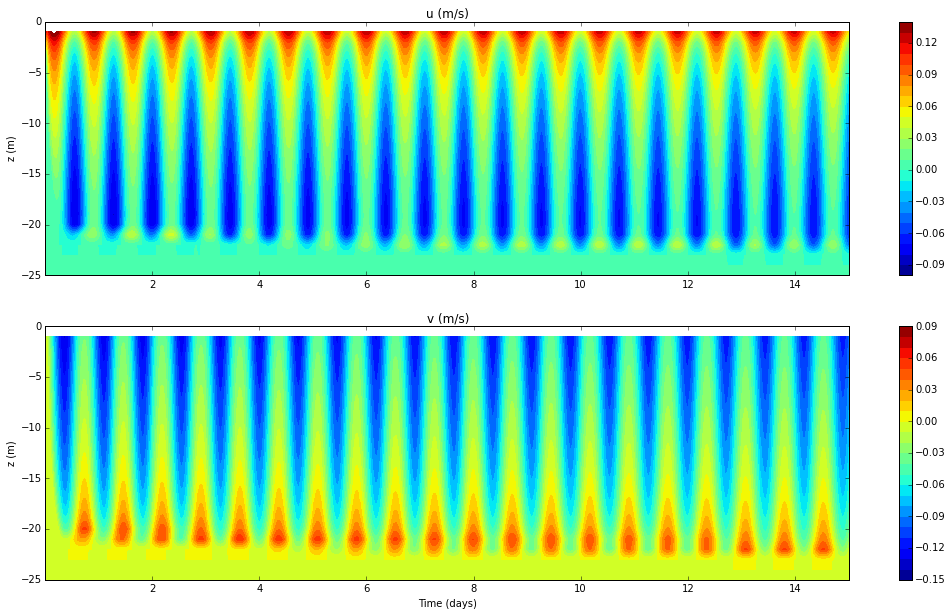

In [46]:
from numpy import arange

# Plot wind field contours as function of time and depth
plt.figure(figsize=[18,10])

plt.subplot(2,1,1)
plt.contourf(time, -zl/100, u.T/100, levels=arange(-.10,.15,.01))
plt.colorbar()
plt.ylim((-max_depth,0))
plt.ylabel('z (m)')
plt.title('u (m/s)')

plt.subplot(2,1,2)
plt.contourf(time, -zl/100, v.T/100, levels=arange(-.15,.10,.01))
plt.colorbar()
plt.ylim((-max_depth,0))
plt.ylabel('z (m)')
plt.title('v (m/s)')
plt.xlabel('Time (days)');

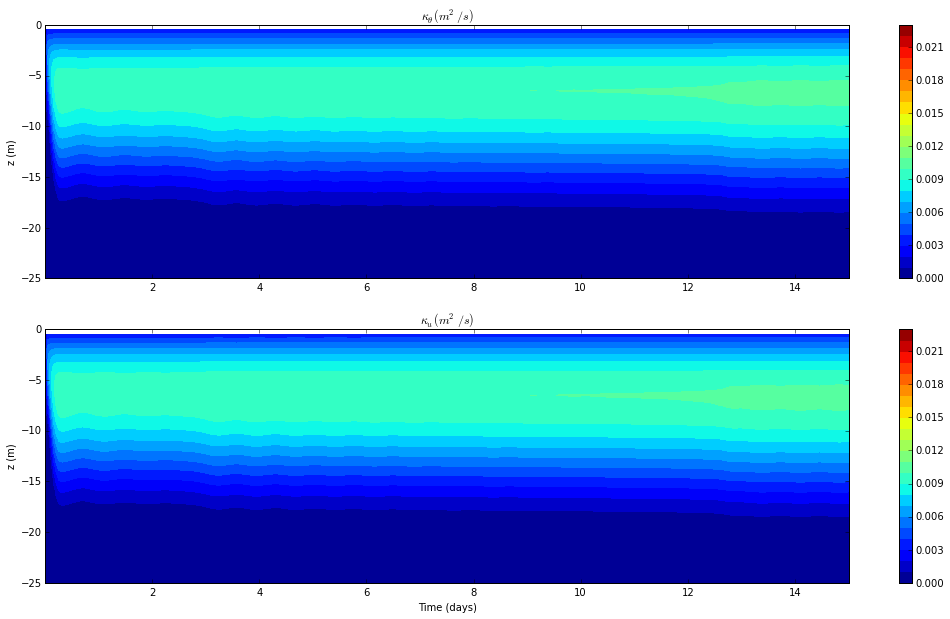

In [47]:
# Plot diffusivities (temperature and momentum) contours as function of time and depth
plt.figure(figsize=[18,10])

plt.subplot(2,1,1)
plt.contourf(time, -zi/100, Kt.T/10000, levels=arange(0,max_diff,diff_contour))

plt.colorbar()
plt.ylim((-max_depth,0))
plt.ylabel('z (m)')
plt.title(r'$\kappa_\theta (m^2/s)$')

plt.subplot(2,1,2)
plt.contourf(time, -zi/100, Ku.T/10000, levels=arange(0,max_diff,diff_contour))
plt.colorbar()
plt.ylim((-max_depth,0))
plt.ylabel('z (m)')
plt.title(r'$\kappa_u (m^2/s)$')
plt.xlabel('Time (days)')